<a href="https://colab.research.google.com/github/rdiazg14/ProductividadEmpleados/blob/main/GarmentsWorkerProductivity_RD_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Context

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories

## Content

This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

Acknowledgements
Relevant Papers:

[1] Imran, A. A., Amin, M. N., Islam Rifat, M. R., & Mehreen, S. (2019). Deep Neural Network Approach for Predicting the Productivity of Garment Employees. 2019 6th International Conference on Control, Decision and Information Technologies (CoDIT). [Web Link]

[2] Rahim, M. S., Imran, A. A., & Ahmed, T. (2021). Mining the Productivity Data of Garment Industry. International Journal of Business Intelligence and Data Mining, 1(1), 1. [Web Link]

## Inspiration

This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.

## Task Details

It is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories.


## About this file
## Attribute Information:

01 date : Date in MM-DD-YYYY

02 day : Day of the Week

03 quarter : A portion of the month. A month was divided into four quarters

04 department : Associated department with the instance

05 teamno : Associated team number with the instance 

06 noofworkers : Number of workers in each team 

07 noofstylechange : Number of changes in the style of a particular product

08 targetedproductivity : Targeted productivity set by the Authority for each team for each day. 

09 smv : Standard Minute Value, it is the allocated time for a task 

10 wip : Work in progress. Includes the number of unfinished items for products 

11 overtime : Represents the amount of overtime by each team in minutes

12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13 idletime : The amount of time when the production was interrupted due to several reasons 

14 idlemen : The number of workers who were idle due to production interruption

15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

# **Importing Libraries and Data**

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [265]:
!wget -O garments_worker_productivity.csv https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv

--2021-07-01 06:41:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94933 (93K) [application/x-httpd-php]
Saving to: ‘garments_worker_productivity.csv’

garments_worker_pro 100%[===================>]  92.71K   238KB/s    in 0.4s    

2021-07-01 06:41:21 (238 KB/s) - ‘garments_worker_productivity.csv’ saved [94933/94933]



In [266]:
# Load input data file
# RD GIT. 1.2 Configuración del DATASET y lectura inicial
#Lectura del dataset
file_name = "garments_worker_productivity.csv"


df=pd.read_csv(file_name, header=0, index_col=0, parse_dates=True, squeeze=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [267]:
df.shape

(1197, 14)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1197 entries, 2015-01-01 to 2015-03-11
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    691 non-null    float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
mem

In [269]:
df.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [270]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [271]:
df.shape

(1197, 14)

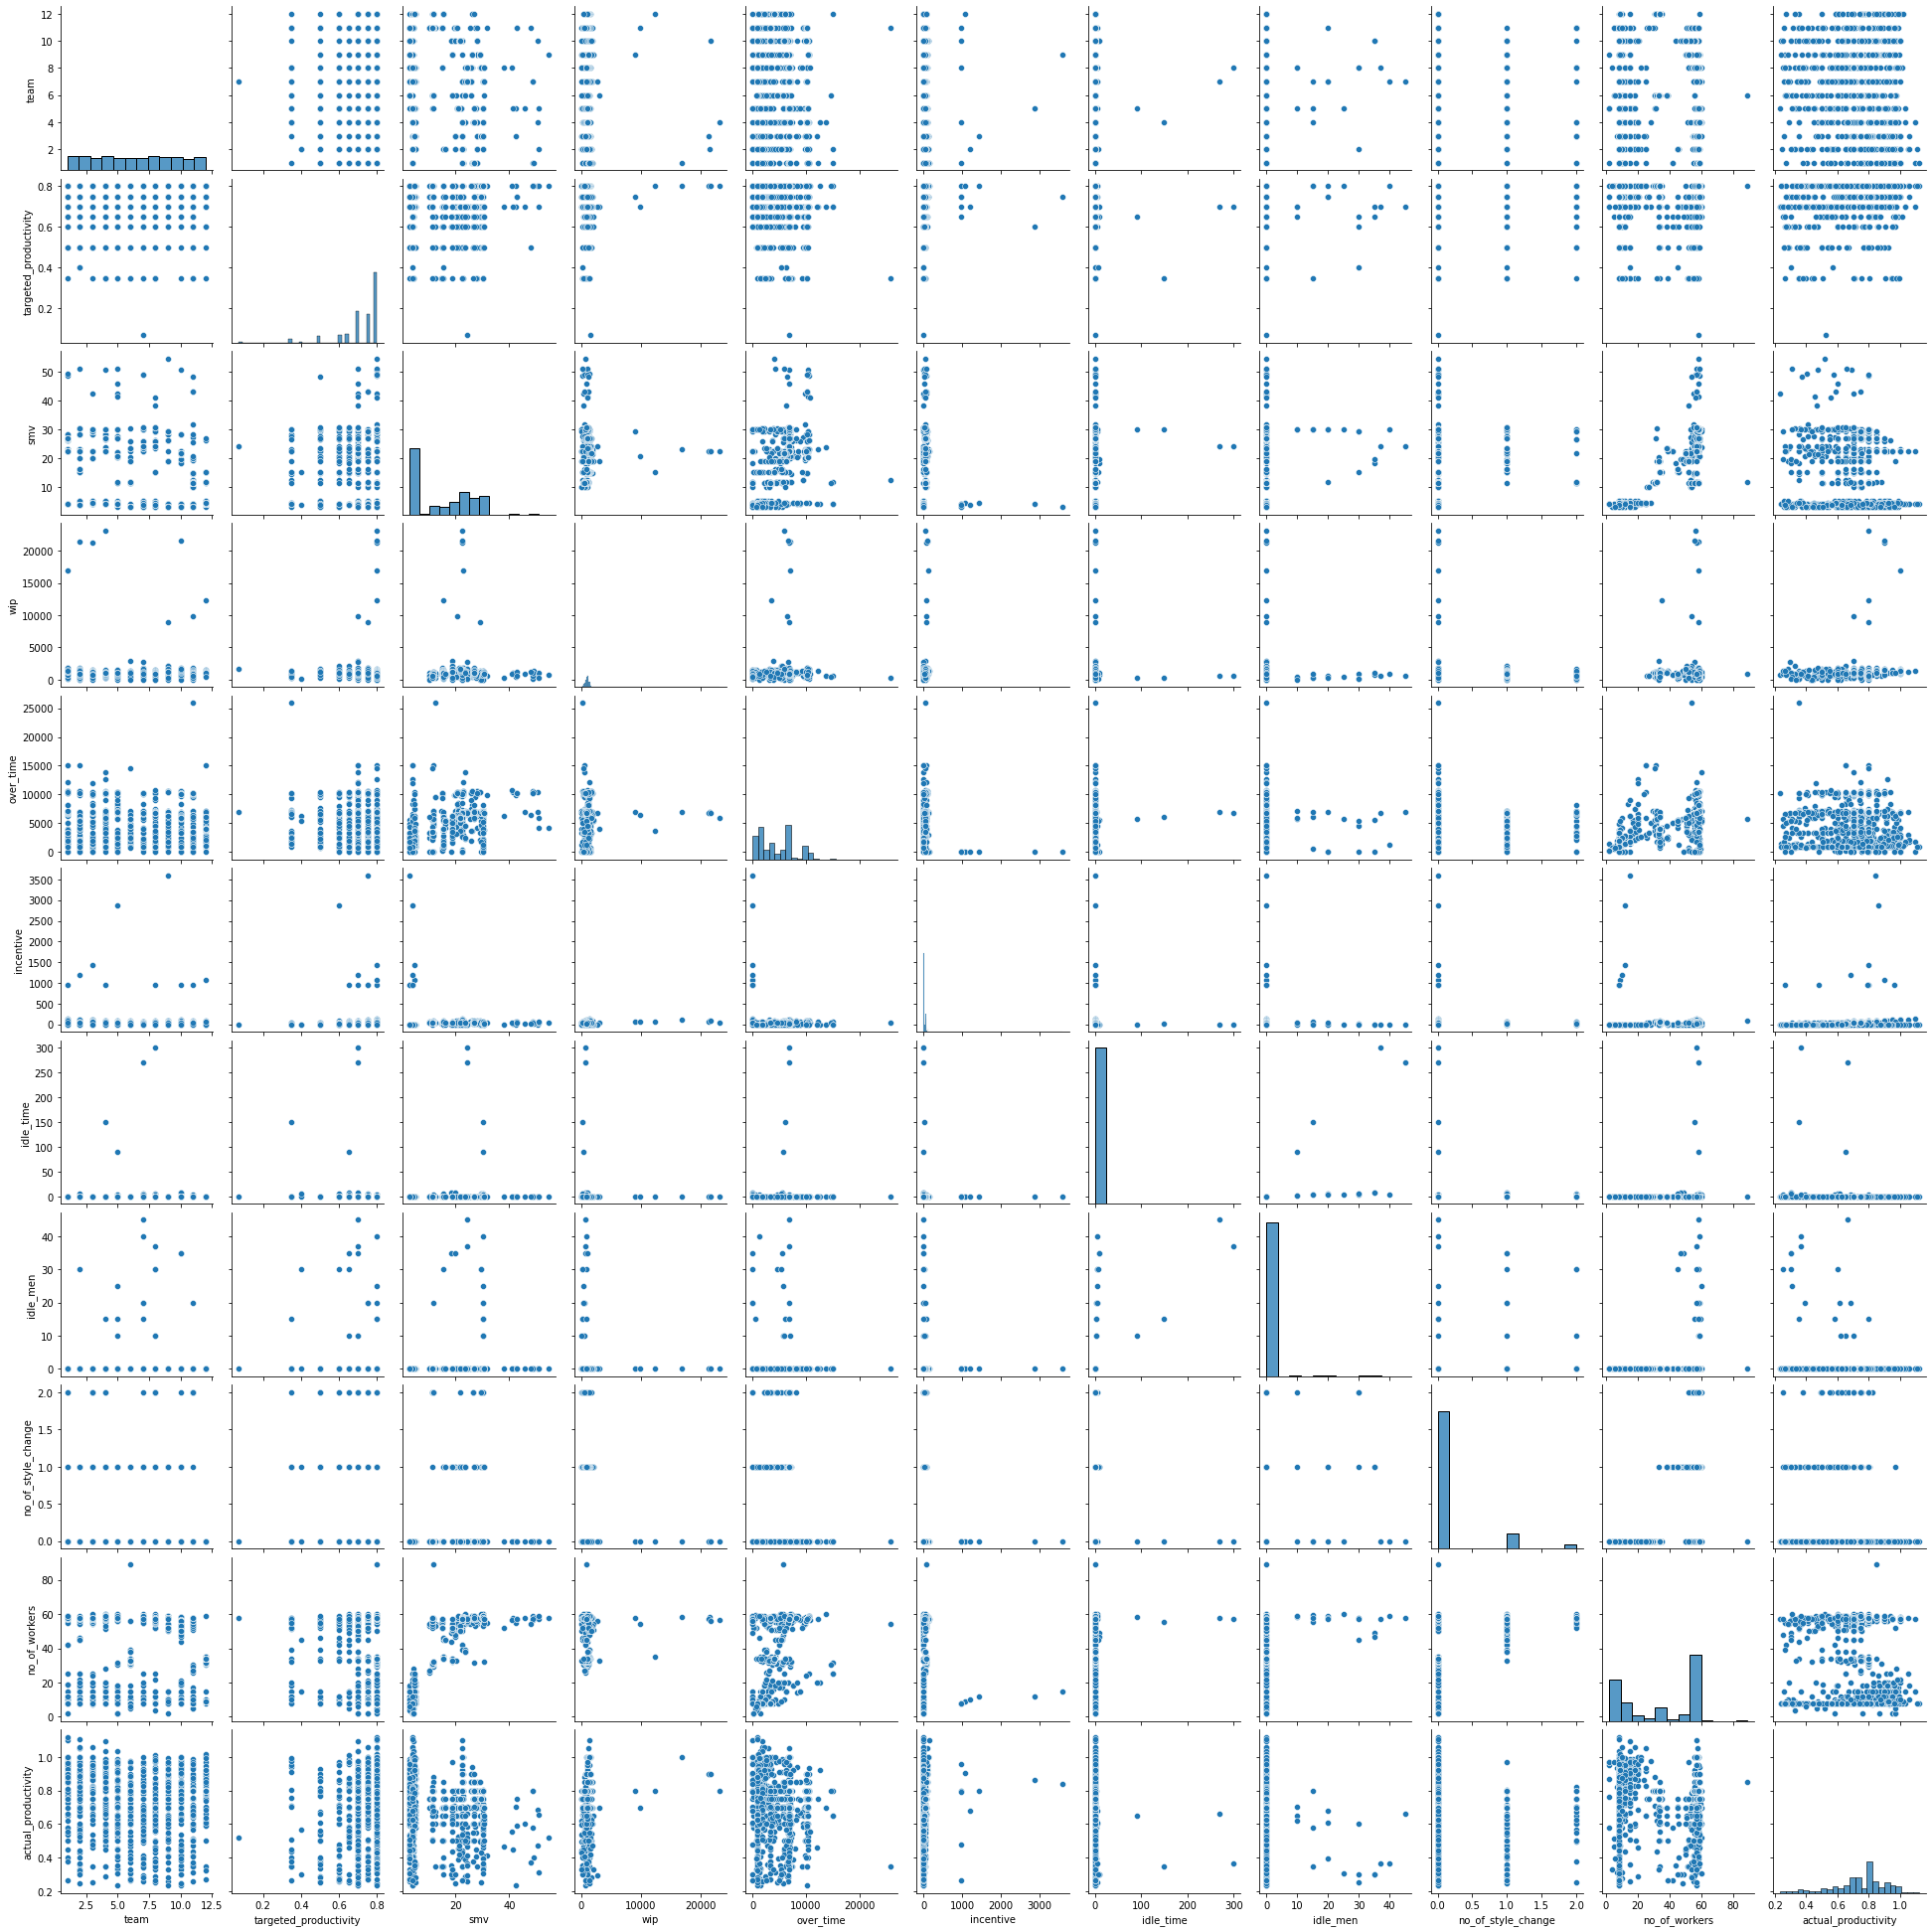

In [272]:
sns.pairplot(df)

# **Categorical Features**

In [273]:
categorical_cols = ['quarter', 'department', 'day', 'team','no_of_style_change'] 

In [274]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


**1-Quarter**

In [275]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

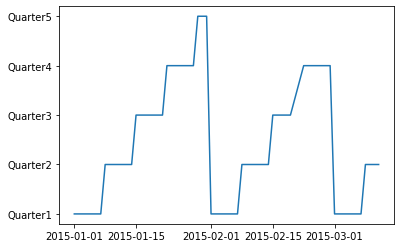

In [276]:
pyplot.plot(df.index,df.quarter)
plt.show()

In [277]:
df_1=df[df['quarter']=='Quarter5']

In [278]:
df_1.shape

(44, 14)

In [279]:
df_1.index

DatetimeIndex(['2015-01-29', '2015-01-29', '2015-01-29', '2015-01-29',
               '2015-01-29', '2015-01-29', '2015-01-29', '2015-01-29',
               '2015-01-29', '2015-01-29', '2015-01-29', '2015-01-29',
               '2015-01-29', '2015-01-29', '2015-01-29', '2015-01-29',
               '2015-01-29', '2015-01-29', '2015-01-29', '2015-01-29',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31',
               '2015-01-31', '2015-01-31', '2015-01-31', '2015-01-31'],
              dtype='datetime64[ns]', name='date', freq=None)

**2-Department**

In [280]:
df.department.value_counts() 

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [281]:
df=df.replace(['finishing '], ['finishing'])  
df.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

**3-Day**

In [282]:
df.day.value_counts() 

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

# **Numeric Features**

In [283]:
df.select_dtypes(include=np.number).columns.tolist()

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

**1. Team**

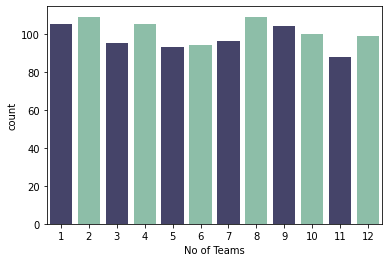

In [284]:
ax = sns.countplot(x = 'team', data = df, palette=["#3f3e6fd1", "#85c6a9"])
plt.xlabel('No of Teams')
plt.show()


**2. SMV**

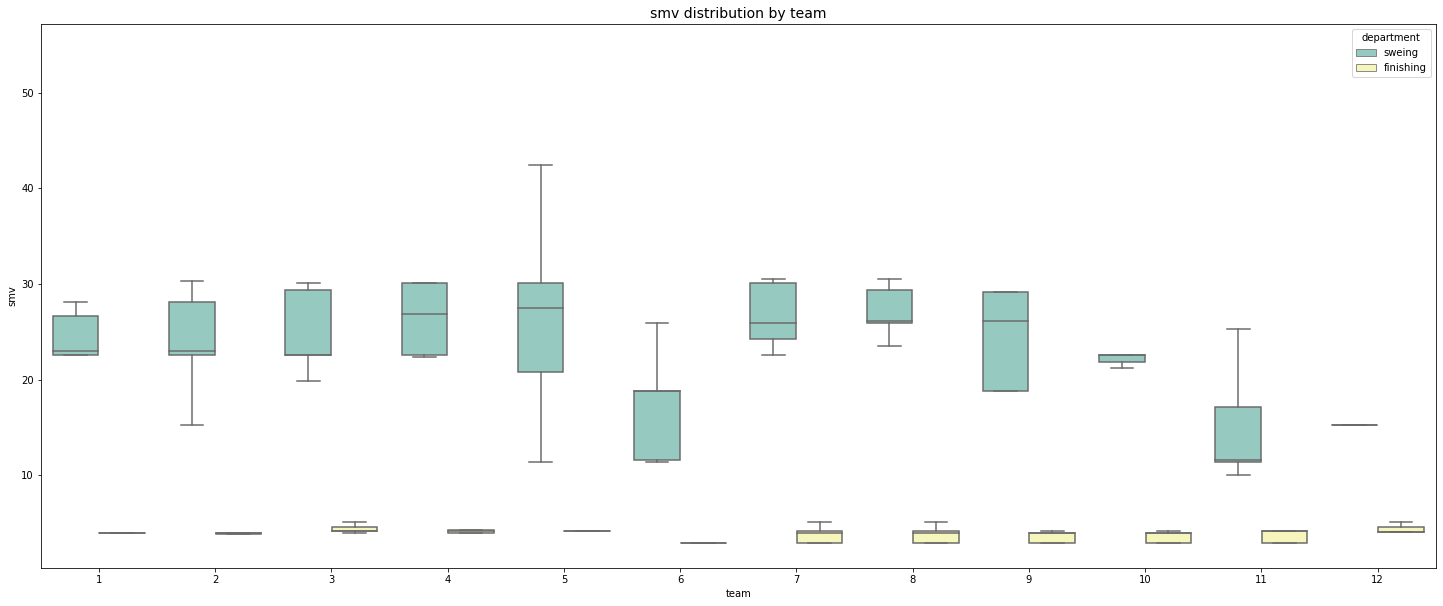

In [285]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x="team", y="smv", hue="department", data = df,
     palette = palette, fliersize = 0)

plt.title('smv distribution by team',fontsize= 14)
plt.show()

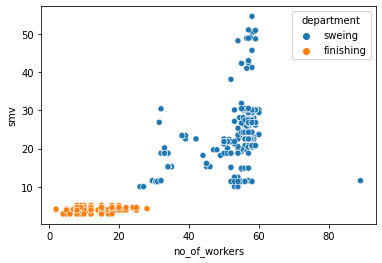

In [286]:
sns.scatterplot(data=df, x="no_of_workers", y="smv", hue="department")

In [287]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

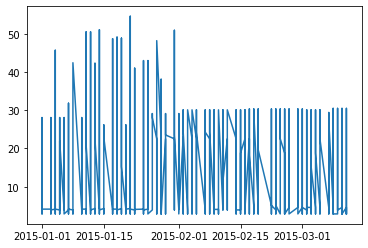

In [288]:
pyplot.plot(df.index,df.smv)

**3 WIP**

In [289]:
df.wip.isnull().sum()

506

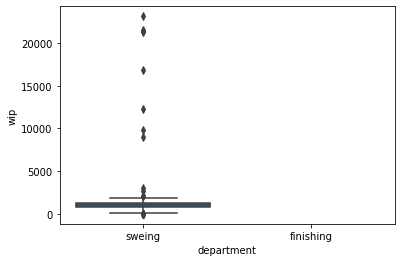

In [290]:
sns.boxplot(x='department',y='wip',data=df)

All null values belongs to the finishing department. The finishing department needs to get a work from the sewing department. This result could mean that the finishing department has no work in progress while waiting for work from the sewing department. So we can replace the null values with zero

In [291]:
#df['wip'] = df['wip'].fillna(0)

In [292]:
#df.wip.isnull().sum()

([<matplotlib.axis.YTick at 0x7fa6cbddb590>,
 <a list of 12 Text major ticklabel objects>)

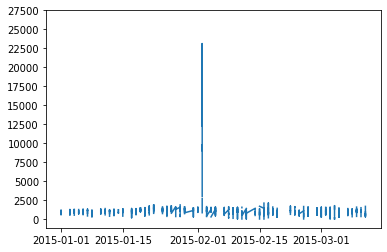

In [293]:
pyplot.plot(df.index,df.wip)
plt.yticks(np.arange(0,30000,step=2500))

In [294]:
df[df['wip']>2500].shape

(10, 14)

In [295]:
df[df['wip']>2500]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-02-02,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
2015-02-02,Quarter1,sweing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158
2015-02-02,Quarter1,sweing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
2015-02-02,Quarter1,sweing,Monday,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130
2015-02-02,Quarter1,sweing,Monday,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402
2015-02-02,Quarter1,sweing,Monday,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393
2015-02-02,Quarter1,sweing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963
2015-02-02,Quarter1,sweing,Monday,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54.0,0.700398
2015-02-02,Quarter1,sweing,Monday,6,0.70,18.79,2984.0,3960,30,0.0,0,0,33.0,0.700355


There are 10 rows with high wip values. Each of these records belongs to the sweating section in the 1st quarter and is on February 2nd.

**4 Over Time**

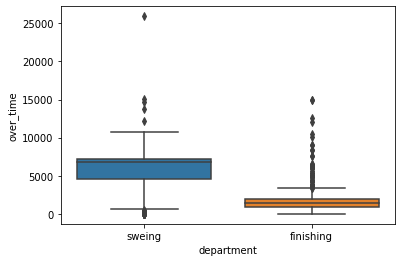

In [296]:
sns.boxplot(x='department',y='over_time',data=df)
plt.show()

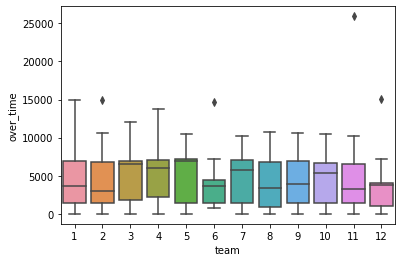

In [297]:
sns.boxplot(x='team',y='over_time',data=df)
plt.show()

In [298]:
over_time_by_team_department = df.groupby(['department', 'team']).median()['over_time']

for team in range(1, 12):
    for department in ['sweing', 'finishing']:
        print('Median over_time of team {} {}s: {}'.format(team, department, over_time_by_team_department[department][team]))
print('Median over_time of teams: {}'.format(df['over_time'].median()))

Median over_time of team 1 sweings: 6960
Median over_time of team 1 finishings: 1440
Median over_time of team 2 sweings: 6840
Median over_time of team 2 finishings: 1440
Median over_time of team 3 sweings: 6840
Median over_time of team 3 finishings: 1800
Median over_time of team 4 sweings: 7020
Median over_time of team 4 finishings: 1920
Median over_time of team 5 sweings: 7080
Median over_time of team 5 finishings: 1440
Median over_time of team 6 sweings: 3960
Median over_time of team 6 finishings: 960
Median over_time of team 7 sweings: 6960
Median over_time of team 7 finishings: 1440
Median over_time of team 8 sweings: 6840
Median over_time of team 8 finishings: 1440
Median over_time of team 9 sweings: 6930
Median over_time of team 9 finishings: 1140
Median over_time of team 10 sweings: 6720
Median over_time of team 10 finishings: 1440
Median over_time of team 11 sweings: 3660
Median over_time of team 11 finishings: 1440
Median over_time of teams: 3960.0


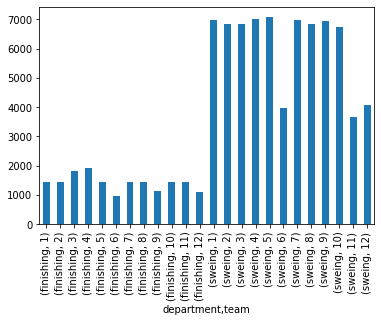

In [299]:
over_time_by_team_department.plot.bar()
plt.show()

In [300]:
over_time_by_team_department.head()

department  team
finishing   1       1440
            2       1440
            3       1800
            4       1920
            5       1440
Name: over_time, dtype: int64

Finishing department has relatively lower over_time values regarding sweing department. In sweing department team6, team11 and team12 have the lowest over_time values.

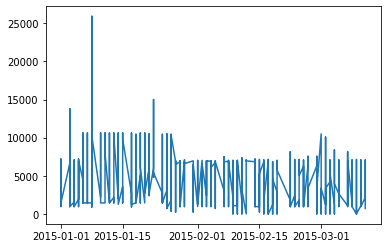

In [301]:
pyplot.plot(df.index,df.over_time)

In [302]:
df[df['over_time']>12000].shape

(8, 14)

In [303]:
df[df['over_time']>12000]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-03,Quarter1,sweing,Saturday,4,0.70,23.69,544.0,13800,0,0.0,0,0,60.0,0.700134
2015-01-08,Quarter2,finishing,Thursday,4,0.80,3.94,NaN,12600,0,0.0,0,0,20.0,0.919905
2015-01-08,Quarter2,sweing,Thursday,12,0.80,11.61,548.0,15120,63,0.0,0,0,31.5,0.800107
2015-01-08,Quarter2,sweing,Thursday,6,0.80,11.41,411.0,14640,50,0.0,0,0,30.5,0.800025
2015-01-08,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951
2015-01-22,Quarter4,sweing,Thursday,1,0.70,22.94,1384.0,12180,63,0.0,0,0,57.0,0.750162
2015-01-22,Quarter4,finishing,Thursday,1,0.70,3.94,NaN,15000,0,0.0,0,0,25.0,0.649662
2015-01-22,Quarter4,finishing,Thursday,2,0.70,3.94,NaN,15000,0,0.0,0,0,25.0,0.649662


No significant relationship was found when peak values of over_time were observed with respect to time

**5 Incentive**

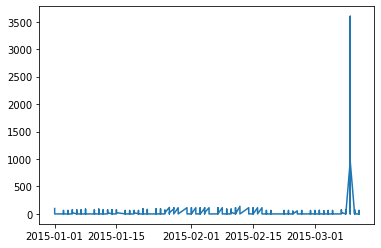

In [304]:
pyplot.plot(df.index,df.incentive)

In [305]:
df[df['incentive']>150].shape

(10, 14)

In [306]:
df[df['incentive']>150]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-03-09,Quarter2,finishing,Monday,11,0.80,2.90,NaN,0,960,0.0,0,0,8.0,0.960625
2015-03-09,Quarter2,finishing,Monday,12,0.80,4.60,NaN,0,1080,0.0,0,0,9.0,0.902963
2015-03-09,Quarter2,finishing,Monday,5,0.60,3.94,NaN,0,2880,0.0,0,0,12.0,0.864343
2015-03-09,Quarter2,finishing,Monday,9,0.75,2.90,NaN,0,3600,0.0,0,0,15.0,0.841000
2015-03-09,Quarter2,finishing,Monday,3,0.80,4.60,NaN,0,1440,0.0,0,0,12.0,0.795417
2015-03-09,Quarter2,finishing,Monday,4,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.795388
2015-03-09,Quarter2,finishing,Monday,1,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.794567
2015-03-09,Quarter2,finishing,Monday,2,0.70,3.90,NaN,0,1200,0.0,0,0,10.0,0.682500
2015-03-09,Quarter2,finishing,Monday,10,0.70,2.90,NaN,0,960,0.0,0,0,8.0,0.477292


All of the highest incentive values belong to the finishing department on March 9, Quarter2.

**6 Idle Time**

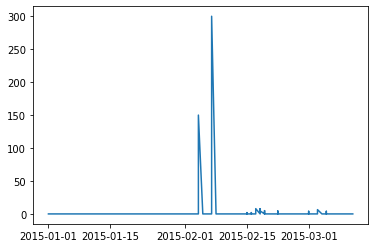

In [307]:
pyplot.plot(df.index,df.idle_time)

In [308]:
df[df['idle_time']>20].shape

(4, 14)

In [309]:
df[df['idle_time']>20]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-02-04,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
2015-02-04,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
2015-02-07,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
2015-02-07,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319


**7 Idle Men**

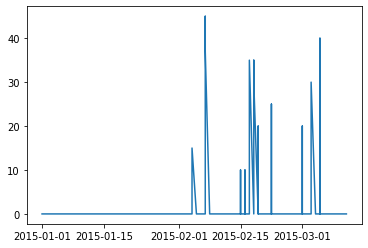

In [310]:
pyplot.plot(df.index,df.idle_men)

In [311]:
df[df['idle_men']>0].shape

(18, 14)

In [312]:
df[df['idle_men']>0]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-02-04,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
2015-02-04,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
2015-02-07,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
2015-02-07,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
2015-02-15,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
2015-02-16,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
2015-02-17,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
2015-02-17,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
2015-02-18,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574


All of the peak values of Idle_men belongs to sweing department

**8 No_of_style_change**

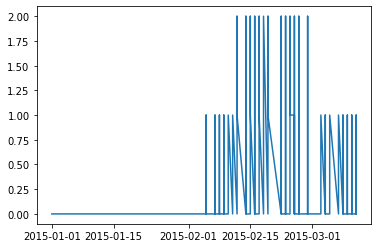

In [313]:
pyplot.plot(df.index,df.no_of_style_change)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


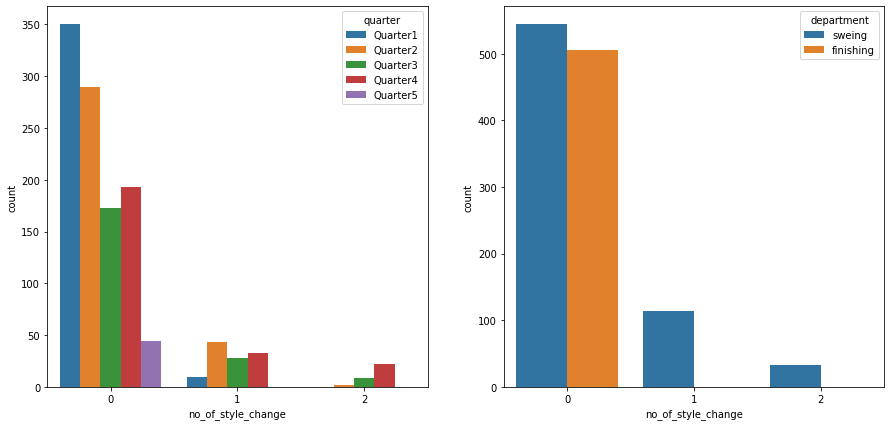

In [314]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(1, 2, 1)
sns.countplot('no_of_style_change',hue='quarter',data=df)
plt.xlabel('no_of_style_change')

plt.subplot(1, 2, 2)
sns.countplot('no_of_style_change',hue='department',data=df)
plt.xlabel('no_of_style_change')

plt.show()

There is no no_of_style_change in Quarter5 and all of changes occured in the sweing department

**9 No_of_workers**

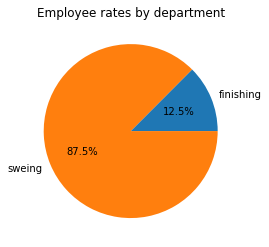

In [315]:
data = df.groupby(['department']).no_of_workers.sum()
data.plot.pie(title="Employee rates by department",autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

Employee rates in sweing and finishing departments are respectively %87.5 and %12.5.

**10 Actual Productivity**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


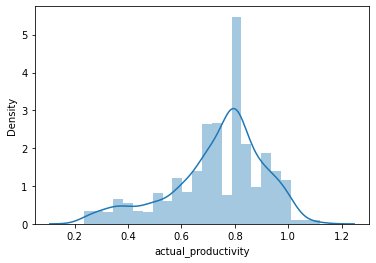

In [316]:
sns.distplot(df.actual_productivity)

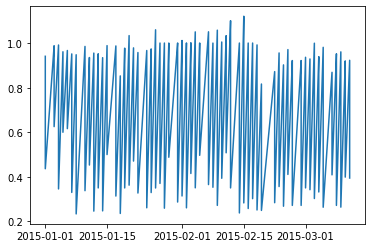

In [317]:
pyplot.plot(df.index,df.actual_productivity)

There is no an obvious pattern with respect to time in actual_productivity

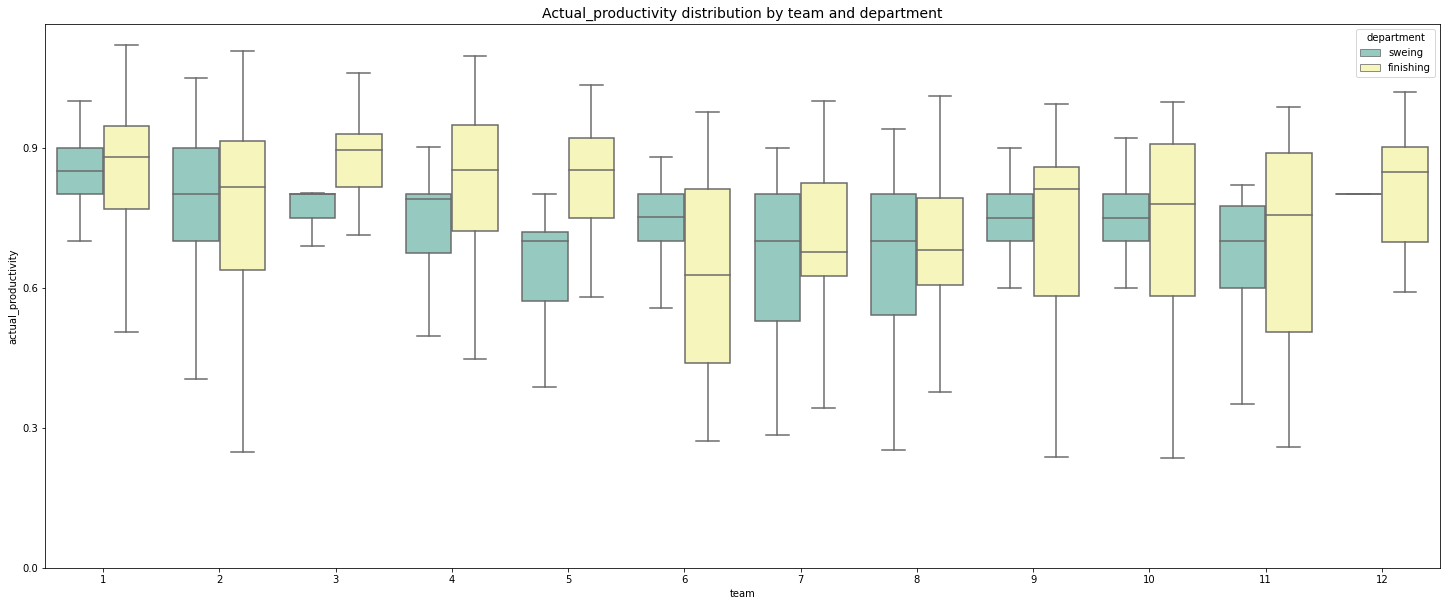

In [318]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = 'actual_productivity', data = df,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Actual_productivity distribution by team and department',fontsize= 14)
plt.show()

**11 Targeted Productivity**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


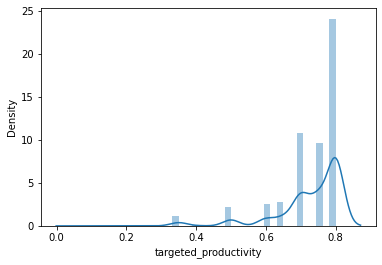

In [319]:
sns.distplot(df['targeted_productivity'])

In [320]:
df.targeted_productivity.value_counts()


0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

When we checked the dates it can be observed that there is a repeated pattern for all quarters with time except Quarter5. We need to look into Quarter5 deeply. There should be a reason for that exception

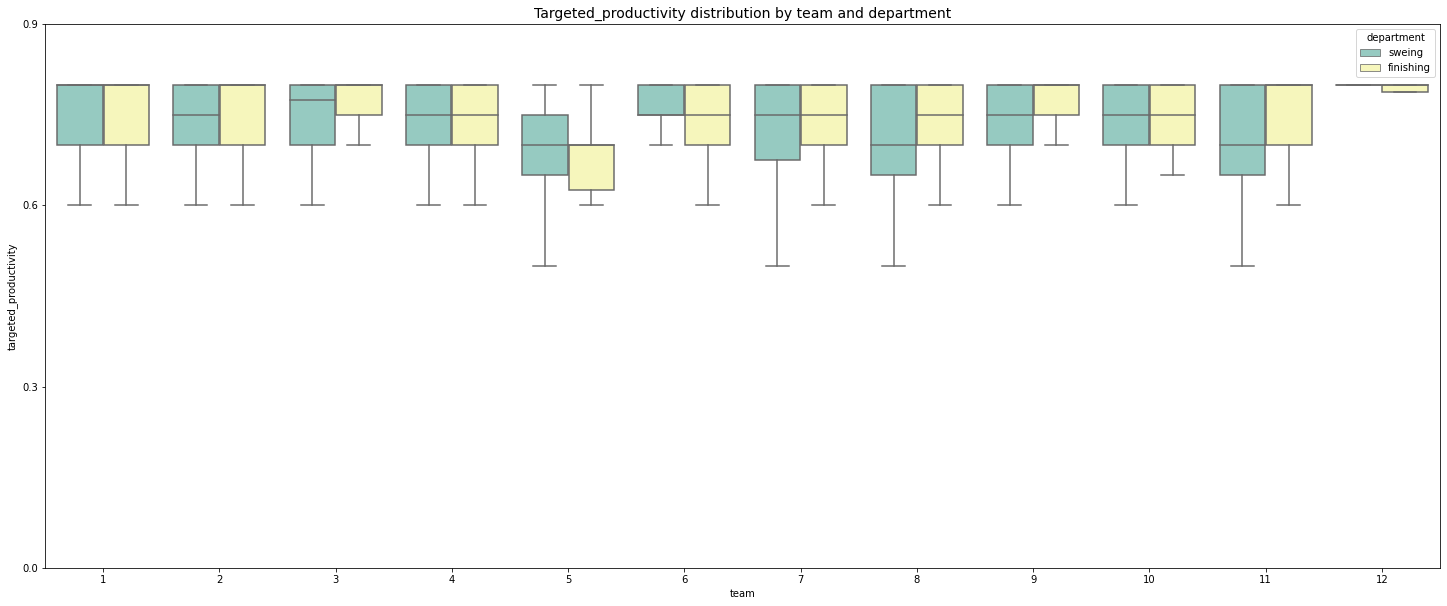

In [321]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = 'targeted_productivity', data = df,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Targeted_productivity distribution by team and department',fontsize= 14)
plt.show()

# **Actual vs Targeted Productivity**

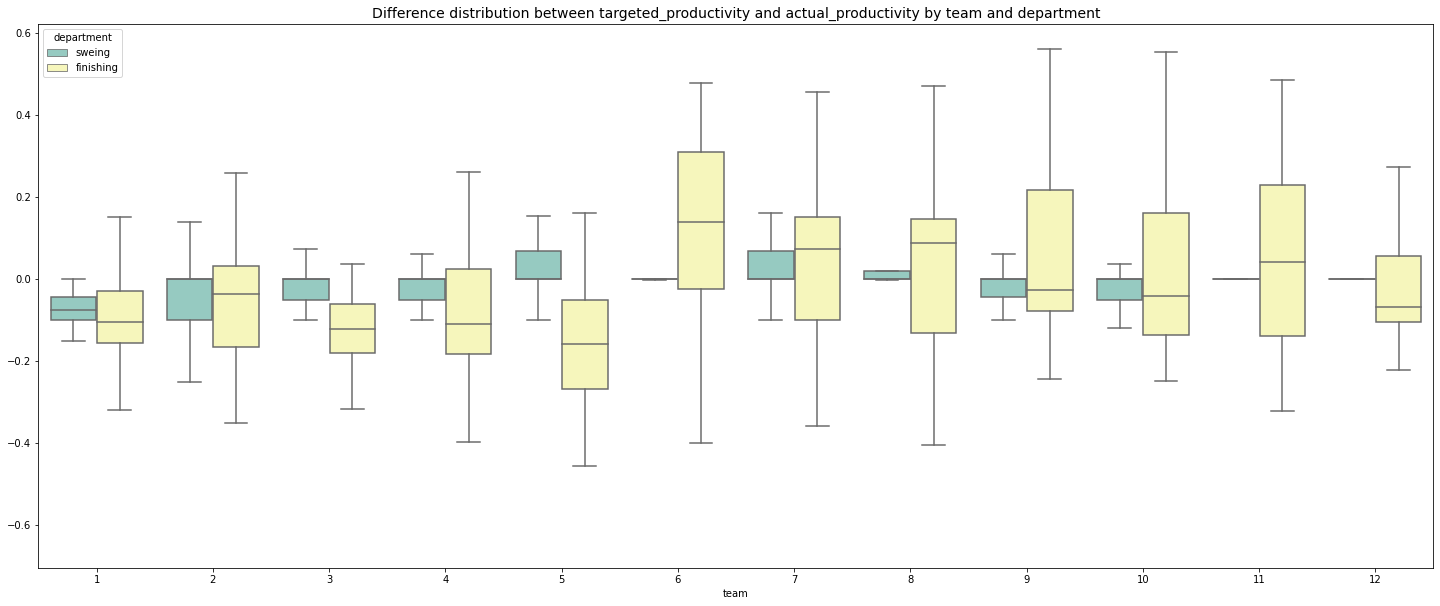

In [322]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = df.targeted_productivity-df.actual_productivity, data = df,
     palette = palette,hue='department',fliersize = 0)

plt.title('Difference distribution between targeted_productivity and actual_productivity by team and department',fontsize= 14)
plt.show()

There are both negative and positive variations from targeted_productivity on team and department basis.

**EDA**

**Correlation Heatmap**

In [323]:
corr=df.corr()
mask=np.zeros(corr.shape,dtype=bool)
mask[np.triu_indices(len(mask))]=True


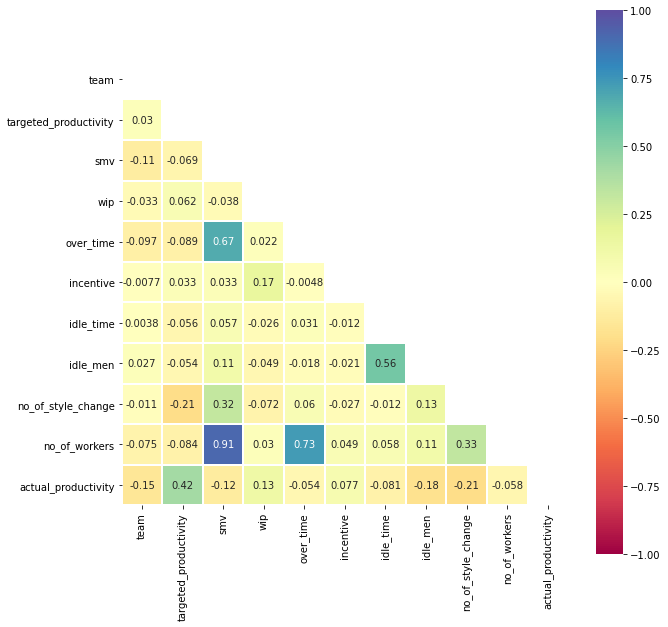

In [324]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Spectral',square=True,mask=mask,linecolor='white',linewidths=1)

**Highest Positive Correlations:**

* No_of workers and smv (0.91)
* No_of workers and over_time (0.73)
* Over_time and smv (0.67)
* Idle_men and Idle_time (0.56)


**Positive Correlations:**

* No_of workers and no_of_style_change(0.33)
* No_of_style_changehas and smv  (0.32)

There isnt any obvious negative correlation between features

**Filling in missing values of wip column**

In [325]:
df['wip'].isnull().sum()

506

In [326]:
df['wip'].fillna(0,inplace=True)

In [327]:
df['wip'].isnull().sum()

0

# **One-hot encoding**

Some columns have identified that may be useful for predicting productivity range:

* quarter
* department
* day
* team
* no_of_style_change


Before we build our model, we need to prepare these columns for machine learning.

In [328]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,"quarter")
df = create_dummies(df,"department")
df = create_dummies(df,"day")
df = create_dummies(df,"team")

df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12'],
      dtype='object')

**Label Encoding**

In [329]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["no_of_style_change_enc"] = le.fit_transform(df["no_of_style_change"])
df.head()


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,team_1,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [330]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_enc'],
      dtype='object')

**Creating Target_Label for productivity**

In [331]:
df['diff']=df.actual_productivity-df.targeted_productivity
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_enc', 'diff'],
      dtype='object')

In [332]:
df['diff'].describe()

count    1197.000000
mean        0.005459
std         0.160082
min        -0.561958
25%        -0.009556
50%         0.000505
75%         0.099111
max         0.644375
Name: diff, dtype: float64

In [333]:
df['Target_label']=np.nan
df.head()
df.loc[df['diff']<0,'Target_label'] = -1
df.loc[(df['diff']==0), 'Target_label'] = 0
df.loc[df['diff']>0, 'Target_label'] = 1
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,team_1,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc,diff,Target_label
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.140725,1.0
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.136500,1.0
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000570,1.0
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000570,1.0
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000382,1.0


If the difference between actual_productivity and targeted_productivity is positive it means productivity is in the range of over_performed,

If the difference between actual_productivity and targeted_productivity is equal to 0 it meansproductivity is in the range of as expected,

If the difference between actual_productivity and targeted_productivity is negative it means productivity is in the range of under_performed

In [334]:
df[df['Target_label']==0]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,team_1,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc,diff,Target_label
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-10,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0
2015-01-11,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
2015-01-11,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0
2015-01-12,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
2015-01-13,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
2015-02-19,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0.0,0.0


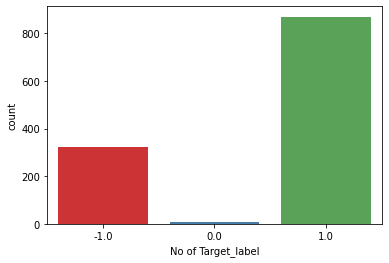

In [335]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()


As it can be seen from the graph above, there is imbalance so it is needed to be handled

In [336]:
df['Target_label'].value_counts()

 1.0    869
-1.0    322
 0.0      6
Name: Target_label, dtype: int64

From the value counts above, it can be seen that the dataset ist imbalanced due to the large number of unbalanced observations. In this case, a binary classification problem can be modelled that predicts whether productivity is in the range of over_performed or not.

As part of our preprocessing,it is needed to turn the 3 class labels into 2 labels:

In [337]:
df['Target_label'] = [-1 if x==-1 else 1 for x in df['Target_label']]

In [338]:
df['Target_label'].value_counts()

 1    875
-1    322
Name: Target_label, dtype: int64

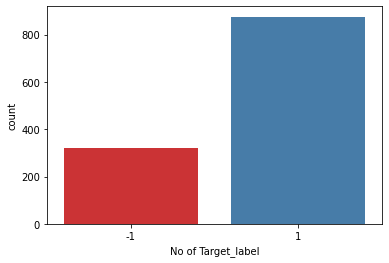

In [339]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

**Balancing Data**

In [340]:
!pip install imbalanced-learn

In [342]:
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [343]:
df1=df.drop(['quarter', 'department', 'day', 'team'],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


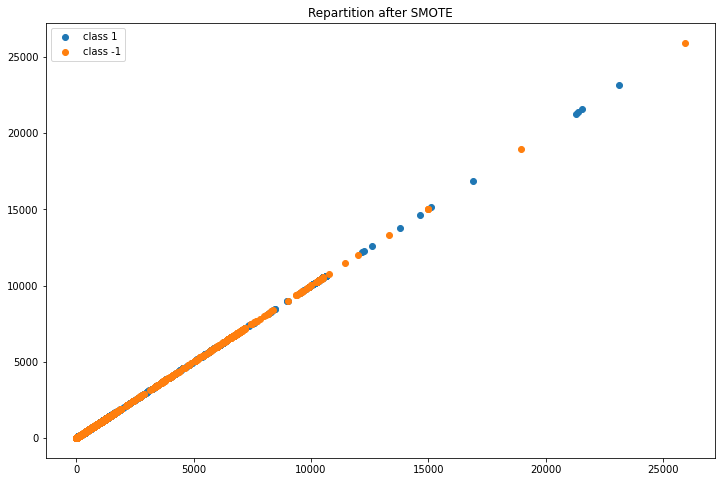

In [258]:
from imblearn.over_sampling import SMOTE
X = df1.loc[:, df1.columns != 'Target_label']
y = df1.Target_label
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)
plt.figure(figsize=(12, 8))
plt.title('Repartition after SMOTE')

#plt.scatter(X_smote[y_smote==1][:, 0], X_smote[y_smote==1][:, 1], label='class 1')
#plt.scatter(X_smote[y_smote==0][:, 0], X_smote[y_smote==0][:, 1], label='class 0')
plt.scatter(X_smote[y_smote==1], X_smote[y_smote==1], label='class 1')
plt.scatter(X_smote[y_smote==-1], X_smote[y_smote==-1], label='class -1')
plt.legend()
plt.grid(False)
plt.show()



In [259]:
X_smote.shape, y_smote.shape

((1750, 37), (1750,))

In [260]:
df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
df.shape

(1750, 38)

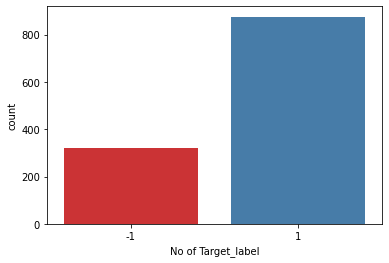

In [344]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

**Splitting Train and Test Data**

In [345]:
from sklearn.model_selection import train_test_split

columns = ['smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_workers', 
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_enc']

X = df[columns]
y = df['Target_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=0)

In [346]:
X_train.shape

(957, 33)

In [347]:
y_train.shape

(957,)

In [348]:
X_test.shape

(240, 33)

In [349]:
y_test.shape

(240,)

# **Scaling**

In [350]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Build Models**

1. Logistic Regression
2. Decision Tree Classifiers
3. Random Forests
4. Support Vector Machines
5. K-Nearest Neighbors
6. Gaussian Naive Bayes
7. LinearDiscriminantAnalysis

In [351]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score,recall_score,accuracy_score

**Machine Learning Classifier Training and Validating**

In [352]:

df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score'
])
models_trained_list = []


def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(X_train, y_train)
    print("Completed {} model training.".format(model_name))
    # Predictions
    y_pred = model.predict(X_test)
    # Add to ith row of dataframe - metrics

    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
    ]
   
    print("Completed {} model's performance assessment.".format(model_name))

In [353]:
models_list = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(),
               KNeighborsClassifier(),
               GaussianNB(),LinearDiscriminantAnalysis()
               ]

In [354]:
from sklearn.metrics import r2_score,f1_score
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Completed LogisticRegression model's performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Completed DecisionTreeClassifier model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Completed RandomForestClassifier model's performance assessment.
Training SVC model...
Completed SVC model training.
Completed SVC model's performance assessment.
Training KNeighborsClassifier model...
Completed KNeighborsClassifier model training.
Completed KNeighborsClassifier model's performance assessment.
Training GaussianNB model...
Completed GaussianNB model training.
Completed GaussianNB model's performance assessment.
Training LinearDiscriminantAnalysis model...
Completed LinearDiscriminantAnalysis model training.
Completed LinearDiscriminantAnalysis model's performance assessment.


In [355]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score
0,LogisticRegression,0.730408,0.733333,0.733333,1.000000,0.846154
1,DecisionTreeClassifier,0.997910,0.754167,0.872611,0.778409,0.822823
2,RandomForestClassifier,0.997910,0.812500,0.850267,0.903409,0.876033
3,SVC,0.730408,0.733333,0.733333,1.000000,0.846154
4,KNeighborsClassifier,0.840125,0.754167,0.785366,0.914773,0.845144
5,GaussianNB,0.649948,0.629167,0.795918,0.664773,0.724458
6,LinearDiscriminantAnalysis,0.761755,0.791667,0.802885,0.948864,0.869792


**Tuning the RandomForestClassifier Model**

In [356]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]}

In [357]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [358]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [359]:
display(cv)

Best parameters are: {'max_depth': None, 'n_estimators': 250}


0.743 + or -0.008 for the {'max_depth': 2, 'n_estimators': 5}
0.732 + or -0.008 for the {'max_depth': 2, 'n_estimators': 10}
0.736 + or -0.005 for the {'max_depth': 2, 'n_estimators': 50}
0.731 + or -0.004 for the {'max_depth': 2, 'n_estimators': 100}
0.73 + or -0.005 for the {'max_depth': 2, 'n_estimators': 250}
0.766 + or -0.003 for the {'max_depth': 4, 'n_estimators': 5}
0.773 + or -0.019 for the {'max_depth': 4, 'n_estimators': 10}
0.776 + or -0.01 for the {'max_depth': 4, 'n_estimators': 50}
0.771 + or -0.018 for the {'max_depth': 4, 'n_estimators': 100}
0.775 + or -0.012 for the {'max_depth': 4, 'n_estimators': 250}
0.782 + or -0.039 for the {'max_depth': 8, 'n_estimators': 5}
0.773 + or -0.018 for the {'max_depth': 8, 'n_estimators': 10}
0.797 + or -0.02 for the {'max_depth': 8, 'n_estimators': 50}
0.804 + or -0.025 for the {'max_depth': 8, 'n_estimators': 100}
0.814 + or -0.014 for the {'max_depth': 8, 'n_estimator

In [360]:
model = cv.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))

Accuracy:  0.8166666666666667
Precision:  0.8548387096774194
Recall:  0.9034090909090909
f1-score:  0.8784530386740332


In [361]:
df1_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score'
])

def get_perf_metrics_t(model):
    model = cv.best_estimator_
    model_name =RandomForestClassifier()
    
    print('Training RandomForestClassifier()')
    model.fit(X_train, y_train)
    print('Completed RandomForestClassifier()')
    y_pred = model.predict(X_test)
    
    df1_perf_metrics.loc[0] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
    ]
    
    print("Completed RandomForestClassifier() model's performance assessment.")

get_perf_metrics_t(model)

Training RandomForestClassifier()
Completed RandomForestClassifier()
Completed RandomForestClassifier() model's performance assessment.


In [362]:
df1_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score
0,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.99791,0.804167,0.84127,0.903409,0.871233
